## Training

In [1]:
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense, Input, Add, merge, concatenate
from keras.layers.convolutional import Conv3D
from keras.layers.pooling import MaxPooling3D, GlobalAveragePooling3D, AveragePooling3D
from keras import metrics
from keras import optimizers
from keras.utils import plot_model
from keras import backend as K
from keras.utils.training_utils import multi_gpu_model
from keras.utils.data_utils import Sequence
from keras.callbacks import ModelCheckpoint
from keras.initializers import he_uniform
from keras.initializers import glorot_uniform

import numpy as np
import sys
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append("models/")
sys.path.append("scripts/")

/usr/local/anaconda3/envs/deeplearning/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4, 5, 6, 7"

In [3]:
from my_classes import DataGenerator, AugmentedDataGenerator

In [4]:
# Load the data
h5f = h5py.File('data/data_cano_distributed2.h5', 'r')
train_x, train_y = h5f['train_x'][:], h5f['train_y'][:]
valid_x, valid_y = h5f['valid_x'][:], h5f['valid_y'][:]
test_x, test_y = h5f['test_x'][:], h5f['test_y'][:]
h5f.close()

print(train_x.shape, valid_x.shape, test_x.shape)

(3011, 24, 24, 24, 16) (377, 24, 24, 24, 16) (376, 24, 24, 24, 16)


In [5]:
from models import Squeeze_model

In [6]:
# from IPython.display import SVG
# from keras.utils.vis_utils import plot_model, model_to_dot
# model_input = Input(shape=(24, 24, 24, 16))
# squeeze_model = Model(inputs=model_input, outputs=Squeeze_model(model_input))
# #plot_model(squeeze_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# SVG(model_to_dot(squeeze_model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))
# # plot_model(get_model4((24, 24, 24, 16)))

In [8]:
# Training parameters
nb_gpus = 4
nb_batch = nb_gpus*3
nb_epochs =200
l_rate = 1e-5
decay_rate = l_rate / nb_epochs

In [9]:
# checkpoint
outputFolder = './weights'
# if not os.path.exists(outputFolder):
#     os.makedirs(outputFolder)

filepath=outputFolder+"/weights-distributed_cano_rotated_90.h5"

callbacks_list = [ModelCheckpoint(filepath, 
                                  monitor='val_loss',
                                  verbose=1,
                                  save_best_only=True,
                                  save_weights_only=True,
                                  mode='auto', period=1)]

In [10]:
model_input = Input(shape=(24, 24, 24, 16))
squeeze_model = Model(inputs=model_input, outputs=Squeeze_model(model_input))
model = multi_gpu_model(squeeze_model, gpus=nb_gpus)

model.compile(optimizer=optimizers.adam(lr=l_rate),# beta_1=0.99, beta_2=0.999),
              loss='mean_absolute_error')

In [11]:
aug_data_gen = AugmentedDataGenerator(x=train_x, y=train_y, batch_size=nb_batch)
aug_val_gen = AugmentedDataGenerator(x=valid_x, y=valid_y, batch_size=nb_batch)

In [12]:
for x, y in aug_data_gen:
    print(x.shape, y.shape)
    break

(288, 24, 24, 24, 16) (288,)


In [13]:
history = model.fit_generator(generator=aug_data_gen, validation_data=aug_val_gen,
                              use_multiprocessing=False, 
                              epochs=nb_epochs, 
                              max_queue_size=5, 
                              workers=56, 
                              verbose=1, callbacks=callbacks_list)

Epoch 1/200
250/250 [==============================] - 319s 1s/step - loss: 2.7923 - val_loss: 1.4809

Epoch 00001: val_loss improved from inf to 1.48086, saving model to ./weights/weights-distributed_cano_rotated_90.h5
Epoch 2/200
250/250 [==============================] - 249s 994ms/step - loss: 1.5910 - val_loss: 1.6245

Epoch 00002: val_loss did not improve
Epoch 3/200
250/250 [==============================] - 356s 1s/step - loss: 1.5970 - val_loss: 1.5107

Epoch 00003: val_loss did not improve
Epoch 4/200
250/250 [==============================] - 284s 1s/step - loss: 1.6165 - val_loss: 1.7235

Epoch 00004: val_loss did not improve
Epoch 5/200
250/250 [==============================] - 361s 1s/step - loss: 1.5458 - val_loss: 1.6098

Epoch 00005: val_loss did not improve
Epoch 6/200
250/250 [==============================] - 360s 1s/step - loss: 1.5568 - val_loss: 1.5188

Epoch 00006: val_loss did not improve
Epoch 7/200
250/250 [==============================] - 295s 1s/step - lo

250/250 [==============================] - 146s 582ms/step - loss: 1.4341 - val_loss: 1.4705

Epoch 00053: val_loss did not improve
Epoch 54/200
250/250 [==============================] - 146s 585ms/step - loss: 1.3900 - val_loss: 1.3280

Epoch 00054: val_loss did not improve
Epoch 55/200
250/250 [==============================] - 146s 585ms/step - loss: 1.4194 - val_loss: 1.3305

Epoch 00055: val_loss did not improve
Epoch 56/200
250/250 [==============================] - 148s 591ms/step - loss: 1.4203 - val_loss: 1.3893

Epoch 00056: val_loss did not improve
Epoch 57/200
250/250 [==============================] - 145s 580ms/step - loss: 1.3848 - val_loss: 1.3951

Epoch 00057: val_loss did not improve
Epoch 58/200
250/250 [==============================] - 148s 592ms/step - loss: 1.4176 - val_loss: 1.6851

Epoch 00058: val_loss did not improve
Epoch 59/200
250/250 [==============================] - 145s 580ms/step - loss: 1.4108 - val_loss: 1.3747

Epoch 00059: val_loss did not improv

250/250 [==============================] - 135s 541ms/step - loss: 1.3531 - val_loss: 1.3336

Epoch 00107: val_loss did not improve
Epoch 108/200
250/250 [==============================] - 135s 540ms/step - loss: 1.3495 - val_loss: 1.2844

Epoch 00108: val_loss did not improve
Epoch 109/200
250/250 [==============================] - 135s 540ms/step - loss: 1.3582 - val_loss: 1.4180

Epoch 00109: val_loss did not improve
Epoch 110/200
250/250 [==============================] - 133s 530ms/step - loss: 1.3084 - val_loss: 1.2353

Epoch 00110: val_loss improved from 1.23898 to 1.23532, saving model to ./weights/weights-distributed_cano_rotated_90.h5
Epoch 111/200
250/250 [==============================] - 133s 533ms/step - loss: 1.3573 - val_loss: 1.3581

Epoch 00111: val_loss did not improve
Epoch 112/200
250/250 [==============================] - 136s 545ms/step - loss: 1.2982 - val_loss: 1.2510

Epoch 00112: val_loss did not improve
Epoch 113/200
250/250 [==============================] 


Epoch 00162: val_loss did not improve
Epoch 163/200
250/250 [==============================] - 134s 536ms/step - loss: 1.2369 - val_loss: 1.3137

Epoch 00163: val_loss did not improve
Epoch 164/200
250/250 [==============================] - 134s 535ms/step - loss: 1.2438 - val_loss: 1.4203

Epoch 00164: val_loss did not improve
Epoch 165/200
250/250 [==============================] - 133s 532ms/step - loss: 1.2672 - val_loss: 1.3310

Epoch 00165: val_loss did not improve
Epoch 166/200
250/250 [==============================] - 134s 538ms/step - loss: 1.2647 - val_loss: 1.3132

Epoch 00166: val_loss did not improve
Epoch 167/200
250/250 [==============================] - 133s 533ms/step - loss: 1.2346 - val_loss: 1.2682

Epoch 00167: val_loss did not improve
Epoch 168/200
250/250 [==============================] - 136s 546ms/step - loss: 1.2507 - val_loss: 1.3447

Epoch 00168: val_loss did not improve
Epoch 169/200
250/250 [==============================] - 136s 545ms/step - loss: 1.24

In [14]:
# Save the history
import pickle

with open(os.path.join(outputFolder, "history_distributed_cano_rotated_90.pickle"), 'wb') as f:
    pickle.dump(history.history, f)

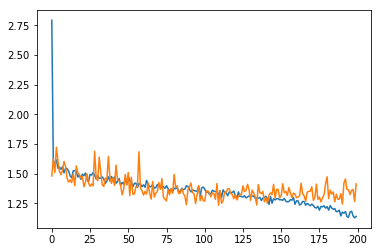

In [15]:
# First 100 epochs
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [16]:
# Save the weights
model.load_weights(filepath)

In [17]:
# model.load_weights("weights/weights_distributed_cano_rotated_90.h5")

In [18]:
from sklearn.metrics import r2_score

In [19]:
sample_size = 200
rotation_count = 24

train_aug_data_gen = AugmentedDataGenerator(x=train_x,
                                            y=train_y,
                                            batch_size=sample_size)
# Two chunks to avoid memory issues
test_aug_data_gen= AugmentedDataGenerator(x=test_x[:sample_size],
                                            y=test_y[:sample_size],
                                            batch_size=sample_size)

# Train r2

for x, y in train_aug_data_gen:
    # Without average
    train_r2 = r2_score(y_true=y, y_pred=model.predict(x))
    print("Train r2 (without average): ", train_r2)
    
    # With average
    y_pred = model.predict(x)[:, 0]
    
    sample_y = np.zeros(sample_size)
    sample_ypred = np.zeros(sample_size)
    for i in range(sample_size):
        start = i*rotation_count
        end = i*rotation_count + rotation_count
        mean_ypred = np.mean(y_pred[start:end])
        mean_y = np.mean(y[start:end])
        sample_ypred[i] = mean_ypred
        sample_y[i] = mean_y
    
    train_r2 = r2_score(y_true=sample_y, y_pred=sample_ypred)
    print("Train r2 (with average): ", train_r2)
    break
    
#sample_size = test_x.shape[0]
    
# Test r2

for x, y in test_aug_data_gen:
    # Without average
    test_r2 = r2_score(y_true=y, y_pred=model.predict(x))
    print("Test r2 (without average): ", test_r2)
    
    # With average
    y_pred = model.predict(x)[:, 0]
    
    sample_y = np.zeros(sample_size)
    sample_ypred = np.zeros(sample_size)
    for i in range(sample_size):
        start = i*rotation_count
        end = i*rotation_count + rotation_count
        mean_ypred = np.mean(y_pred[start:end])
        mean_y = np.mean(y[start:end])
        sample_ypred[i] = mean_ypred
        sample_y[i] = mean_y
    
    test_r2 = r2_score(y_true=sample_y, y_pred=sample_ypred)
    print("Test r2 (with average): ", test_r2)
    break

Train r2 (without average):  0.3259518022550295
Train r2 (with average):  0.3385686170203386
Test r2 (without average):  0.308429803951493
Test r2 (with average):  0.323514774352037
